#**3.1.5. Regresión Lineal Múltiple**#

##**1. Implementación de la Regresión Lineal Múltiple**##

Fuente de set de datos: https://www.kaggle.com/shivam2503/diamonds

Revise, antes de comenzar, la descripción del conjunto de datos con el cual va a trabajar.

###**1.1. Carga de Datos**###

In [ ]:
from google.colab import files
files.upload()

In [3]:
import pandas as pd
data_frame = pd.read_csv("3.1.6 diamonds.csv")
data_frame.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


###**1.2. Exploración Inicial**###

• Conocer la cantidad de observaciones.

• Tipos de datos.

• Obtención de algunas medidas estadísticas.

• Revisar distribución de los datos.

• Revisar valores nulos.

• Conocer la correlación de variables.

In [4]:
# Cantidad de Obsevaciones
data_frame.shape

(53940, 11)

In [5]:
# Revisar Tipos de Datos
data_frame.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [6]:
# Se descarta la primera columna porque no tiene valor predictivo
data_frame1 = data_frame.drop(["Unnamed: 0"],axis=1)
data_frame1.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
# Medidas Estadísticas
data_frame1.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
# Considerando solo las columnas de tipo object
import numpy as np
data_frame1.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [9]:
# Valores Nulos
for feature in data_frame1.columns:
    print('Total de valores nulos de', feature, '=', data_frame1[feature].isna().sum())

Total de valores nulos de carat = 0
Total de valores nulos de cut = 0
Total de valores nulos de color = 0
Total de valores nulos de clarity = 0
Total de valores nulos de depth = 0
Total de valores nulos de table = 0
Total de valores nulos de price = 0
Total de valores nulos de x = 0
Total de valores nulos de y = 0
Total de valores nulos de z = 0


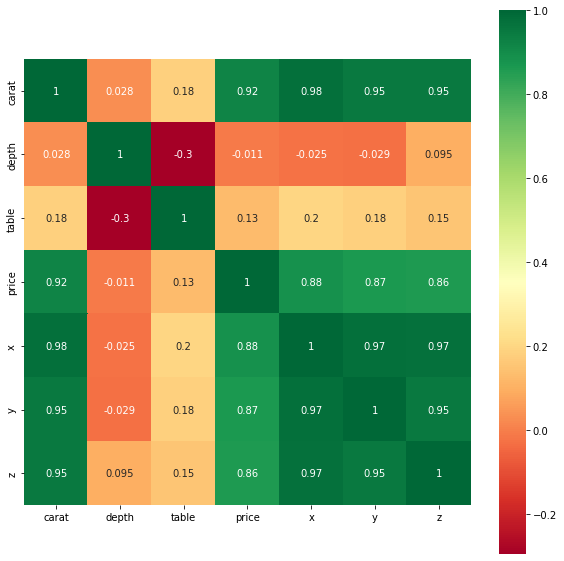

In [10]:
# Correlación de las Variables

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
p=sns.heatmap(data_frame1.corr(), annot=True,cmap='RdYlGn',square=True)

**1.2.1. Comentarios del Gráfico**

• La columna ‘carat’ posee la mayor correlación (0.92).

• Las variables x, y, z tienen una correlación bastante alta con el precio.

###**1.3. Análisis de Características (carat, x, y, z)**###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


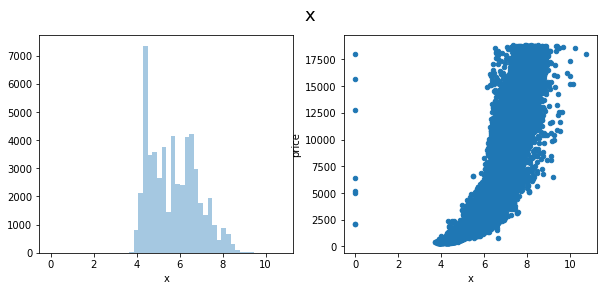

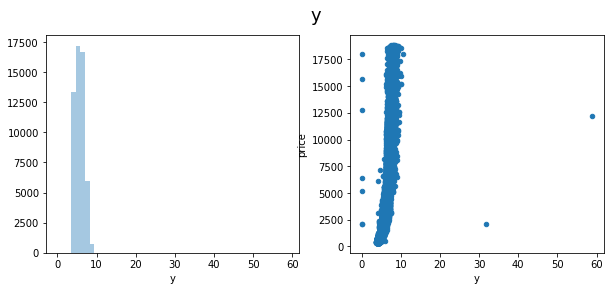

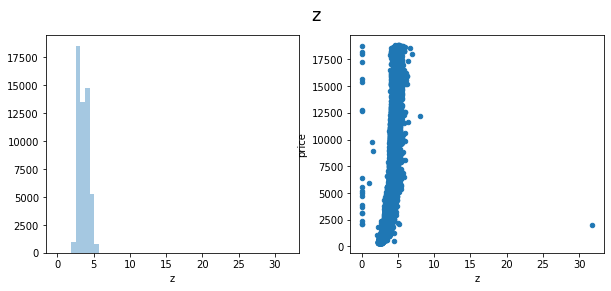

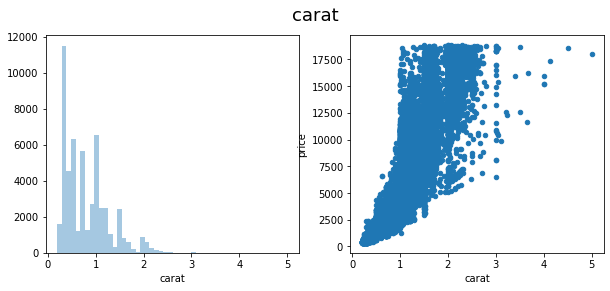

In [11]:
for col in ['x', 'y', 'z', 'carat']:
    fig, ax =plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame1[col], ax=ax[0], kde=False)
    data_frame1[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1])
    plt.show()

**1.3.1. Comentarios de las Gráficas**

De las gráficas anteriores se visualiza que hay obsevaciones que tienen valores 0 en estas características, lo que no tiene mucho sentido porque representan el ancho, alto y profundidad del diamante.

Dada la conclusión anterior, se eliminarán estas observaciones.

In [12]:
data_frame2 = data_frame1[(data_frame1[['x','y','z']] != 0).all(axis=1)]
data_frame2.shape

(53920, 10)

Una vez que se han eliminado las observaciones en cero quedan 53.920 observaciones.

Ahora se vuelven a ver las distribuciones.

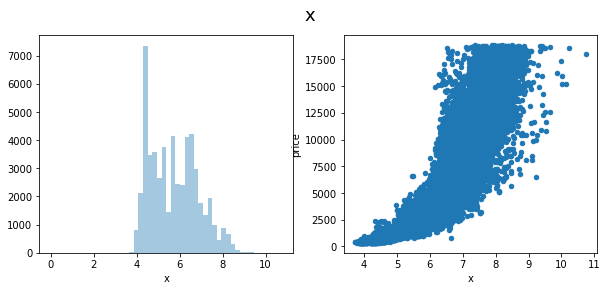

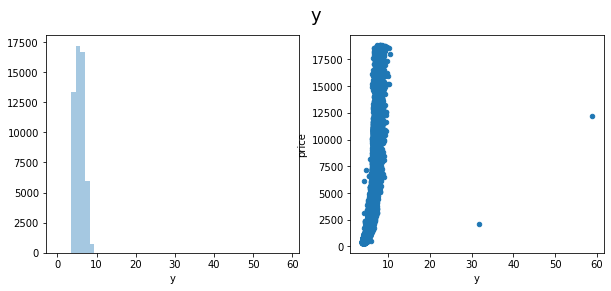

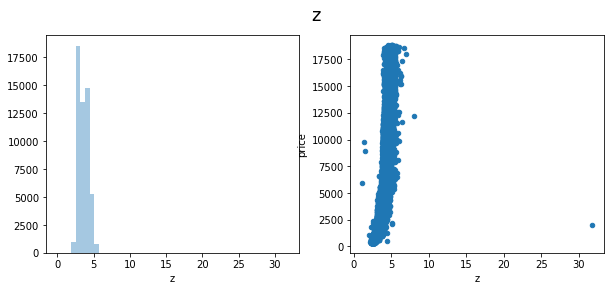

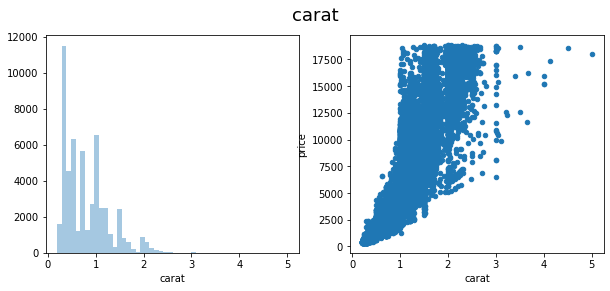

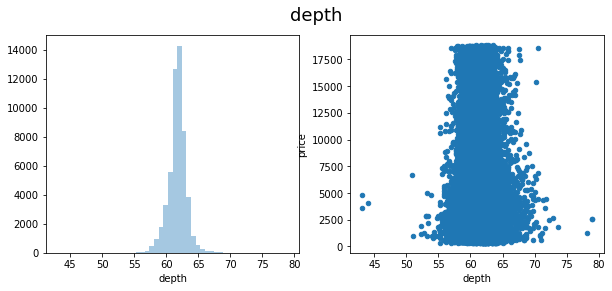

In [13]:
# Visualizamos la distribución de las variables

columnas = ['x', 'y', 'z', 'carat', 'depth']

for col in columnas:
    fig, ax =plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame2[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1])
    plt.show()

###**1.4. Tratamiento de Variables Categóricas**###

Es importante recordar que estas variables no han sido consideradas en el análisis de correlación anterior porque no son numéicas; así es que conveniente considerarlas.

Primero se van a revisar los valores únicos de cada variable categórica. Luego se van a transformar usando onehot-encoder.

In [14]:
data_frame2['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [15]:
data_frame2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [16]:
data_frame2['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['cut'])],remainder='passthrough')
X = np.array(ct.fit_transform(data_frame2))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.0,0.0,0.0,1.0,0.0,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.0,1.0,0.0,0.0,0.0,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.0,0.0,0.0,1.0,0.0,0.29,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.0,1.0,0.0,0.0,0.0,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53915,0.0,0.0,1.0,0.0,0.0,0.72,D,SI1,60.8,57.0,2757,5.75,5.76,3.5
53916,0.0,1.0,0.0,0.0,0.0,0.72,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53917,0.0,0.0,0.0,0.0,1.0,0.7,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53918,0.0,0.0,0.0,1.0,0.0,0.86,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [18]:
# Último Conjunto de Datos después de la Preparación:

data_frame3 = pd.DataFrame(X)
data_frame3.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.0,0.0,0.0,1.0,0.0,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.0,1.0,0.0,0.0,0.0,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.0,0.0,0.0,1.0,0.0,0.29,I,VS2,62.4,58.0,334,4.2,4.23,2.63
4,0.0,1.0,0.0,0.0,0.0,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.0,0.0,0.0,0.0,1.0,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.0,0.0,0.0,0.0,1.0,0.24,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.0,0.0,0.0,0.0,1.0,0.26,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,1.0,0.0,0.0,0.0,0.0,0.22,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.0,0.0,0.0,0.0,1.0,0.23,H,VS1,59.4,61.0,338,4.0,4.05,2.39


###**1.5. Desafío**###

Repita la técnica de transformación con las otras 2 columnas y comente los resultados.

###**1.6. Creando, Validando y Evaluando el Modelo**###

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Se separan las variables predictoras y la predecida
x = data_frame2[['x','y', 'z', 'carat']] # Variables independientes
y = data_frame2['price'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size=0.2,random_state=29)

# Tipo de modelo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


###**1.7. Realizando Predicciones**###

In [20]:
# PREDICCIÓN DEL PRECIO CON RESPECTO A LAS CUATRO CARACTERÍSTICAS PREDICTORAS:

print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))

[657.29432223]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
# CONTRASTE DE LA PREDICCIÓN DEL PRECIO CON RESPECTO AL VALOR REAL:

print(modelo.predict([[4.25, 4.28 , 2.73, 0.30]])) # VALOR REAL 339.

[402.62696052]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


###**1.8. Mejoras**###

Ya se generó un modelo de predicción del precio de un diamante considerando su alto, ancho, profundidad y peso del diamante.

Sin embargo, estas variables no están normalizadas. El desafío ahora es repetir el ejercicio considerando las variables normalizadas.

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_selected = data_frame2[["carat", "x","y","z"]]
scaled_data = sc.fit_transform(data_selected)
df_final = pd.DataFrame(scaled_data).head(10)
df_final

,0,1,2,3
0,-1.198204,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.645173,-1.662014,-1.750896
2,-1.198204,-1.502241,-1.460280,-1.750896
3,-1.071566,-1.368242,-1.319943,-1.295396
4,-1.029353,-1.243176,-1.214690,-1.124583
5,-1.177098,-1.600506,-1.556761,-1.508912
6,-1.177098,-1.591573,-1.539219,-1.523146
7,-1.134885,-1.484374,-1.425195,-1.437740
8,-1.219311,-1.663039,-1.714640,-1.494677
9,-1.198204,-1.546907,-1.477822,-1.637021


###**1.9 Data Set Normalizado y Nueva Aplicación del Algoritmo**

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_selected = data_frame2[["carat", "x","y","z"]]
scaled_data = sc.fit_transform(data_selected)
df_final = pd.DataFrame(scaled_data, columns=["carat", "x","y","z"])
df_final.head(10)

,carat,x,y,z
0,-1.198204,-1.591573,-1.539219,-1.580084
1,-1.240417,-1.645173,-1.662014,-1.750896
2,-1.198204,-1.502241,-1.460280,-1.750896
3,-1.071566,-1.368242,-1.319943,-1.295396
4,-1.029353,-1.243176,-1.214690,-1.124583
5,-1.177098,-1.600506,-1.556761,-1.508912
6,-1.177098,-1.591573,-1.539219,-1.523146
7,-1.134885,-1.484374,-1.425195,-1.437740
8,-1.219311,-1.663039,-1.714640,-1.494677
9,-1.198204,-1.546907,-1.477822,-1.637021


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Se separan las variables predictoras y la predecida
x = df_final[['x','y', 'z', 'carat']] # Variables independientes
y = data_frame2['price'] # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(x, y,
test_size=0.2,random_state=29)

# Tipo de modelo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.85
MSE: 2424851.71
Score del modelo : 0.86


In [27]:
y_pred

array([5665.14649669, 9786.95821479, 3097.57119624, ...,  367.75702132,
        451.29666094, 9371.53219094])

In [26]:
y_test

11246     4967
23660    11708
845       2869
26259    15717
19724     8295
         ...  
30185      722
13869     5648
34421      863
49959      540
23186    11194
Name: price, Length: 10784, dtype: int64

###**1.8. Realizando Predicciones**###

In [ ]:
# PREDICCIÓN DEL PRECIO CON RESPECTO A LAS CUATRO CARACTERÍSTICAS PREDICTORAS:

print(modelo.predict([[4.15, 3.95, 2.25, 0.29]]))

In [ ]:
# CONTRASTE DE LA PREDICCIÓN DEL PRECIO CON RESPECTO AL VALOR REAL:

print(modelo.predict([[4.25, 4.28 , 2.73, 0.30]])) # VALOR REAL 339.